In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy
import json
import time
from scipy.stats import linregress

# Import Gmaps and Requests dependencies.
import gmaps
import requests

# Import the API key.
from config import weather_api_key
from config import g_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carutapera
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nouadhibou
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | atherton
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | verkhnevilyuysk
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | marcona
City not found. Skipping...
Processing Record 12 of Set 1 | mehamn
Processing Record 13 of Set 1 | gairatganj
Processing Record 14 of Set 1 | bowen
Processing Record 15 of Set 1 | djibo
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | youghal
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | khatanga
Processing Reco

Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | san angelo
Processing Record 41 of Set 4 | tazovskiy
Processing Record 42 of Set 4 | muhos
Processing Record 43 of Set 4 | irbil
Processing Record 44 of Set 4 | lasa
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | cap malheureux
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | biak
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | karratha
Processing Record 1 of Set 5 | moratuwa
Processing Record 2 of Set 5 | ostrovnoy
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | umm durman
City not found. Skipping...
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | cap-aux-meules
Processing Record 7 of Set 5 | ulladulla
Processing Record 8 of Set 5 | os
City not found. Skipping...
Processing Record 9 of Set 5 | pimentel
Processing Record 10 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 11 of 

Processing Record 28 of Set 8 | bubaque
Processing Record 29 of Set 8 | amelia
Processing Record 30 of Set 8 | sarkand
Processing Record 31 of Set 8 | rio gallegos
Processing Record 32 of Set 8 | kerman
Processing Record 33 of Set 8 | ati
Processing Record 34 of Set 8 | coihaique
Processing Record 35 of Set 8 | namatanai
Processing Record 36 of Set 8 | mayor pablo lagerenza
Processing Record 37 of Set 8 | amarante do maranhao
Processing Record 38 of Set 8 | havoysund
Processing Record 39 of Set 8 | boyabat
Processing Record 40 of Set 8 | nago
Processing Record 41 of Set 8 | talavera de la reina
Processing Record 42 of Set 8 | staryy biser
City not found. Skipping...
Processing Record 43 of Set 8 | melfi
Processing Record 44 of Set 8 | trapani
Processing Record 45 of Set 8 | saurimo
Processing Record 46 of Set 8 | yeppoon
Processing Record 47 of Set 8 | tomatlan
Processing Record 48 of Set 8 | aklavik
Processing Record 49 of Set 8 | torbay
Processing Record 50 of Set 8 | thessalon
Proce

Processing Record 18 of Set 12 | general pico
Processing Record 19 of Set 12 | zambezi
Processing Record 20 of Set 12 | rawson
Processing Record 21 of Set 12 | vestmanna
Processing Record 22 of Set 12 | burgas
Processing Record 23 of Set 12 | natchez
Processing Record 24 of Set 12 | bocaiuva
Processing Record 25 of Set 12 | comodoro rivadavia
Processing Record 26 of Set 12 | menongue
Processing Record 27 of Set 12 | broken hill
Processing Record 28 of Set 12 | aljezur
Processing Record 29 of Set 12 | leningradskiy
Processing Record 30 of Set 12 | brainerd
Processing Record 31 of Set 12 | moron
Processing Record 32 of Set 12 | labrea
Processing Record 33 of Set 12 | dien bien
City not found. Skipping...
Processing Record 34 of Set 12 | vangaindrano
Processing Record 35 of Set 12 | henties bay
Processing Record 36 of Set 12 | mae hong son
Processing Record 37 of Set 12 | sisimiut
Processing Record 38 of Set 12 | nalut
Processing Record 39 of Set 12 | kholm
Processing Record 40 of Set 12 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carutapera,-1.1950,-46.0200,87.12,57,84,11.81,BR,2021-10-03 13:27:28
1,Ushuaia,-54.8000,-68.3000,44.26,65,75,5.75,AR,2021-10-03 13:34:42
2,Nouadhibou,20.9310,-17.0347,78.78,69,4,19.57,MR,2021-10-03 13:27:54
3,Tuatapere,-46.1333,167.6833,45.82,90,100,3.83,NZ,2021-10-03 13:26:39
4,Atherton,53.5237,-2.4935,61.29,75,12,11.01,GB,2021-10-03 13:36:02
...,...,...,...,...,...,...,...,...,...
553,Deputatskiy,69.3000,139.9000,13.14,94,77,4.65,RU,2021-10-03 13:38:56
554,Palauig,15.4350,119.9045,81.43,80,96,5.23,PH,2021-10-03 13:38:57
555,Rio Grande,-32.0350,-52.0986,67.95,79,100,9.17,BR,2021-10-03 13:34:41
556,Farafangana,-22.8167,47.8333,75.00,80,0,17.13,MG,2021-10-03 13:38:57


In [7]:
# Reorder the columns of the Data Frame

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", ]

city_data_df = city_data_df [new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carutapera,BR,2021-10-03 13:27:28,-1.1950,-46.0200,87.12,57,84,11.81
1,Ushuaia,AR,2021-10-03 13:34:42,-54.8000,-68.3000,44.26,65,75,5.75
2,Nouadhibou,MR,2021-10-03 13:27:54,20.9310,-17.0347,78.78,69,4,19.57
3,Tuatapere,NZ,2021-10-03 13:26:39,-46.1333,167.6833,45.82,90,100,3.83
4,Atherton,GB,2021-10-03 13:36:02,53.5237,-2.4935,61.29,75,12,11.01


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

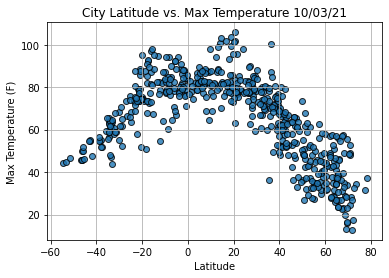

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

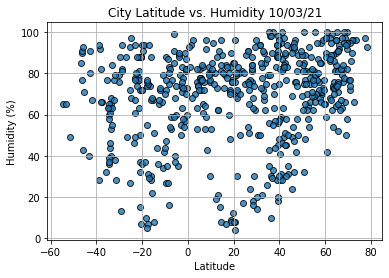

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

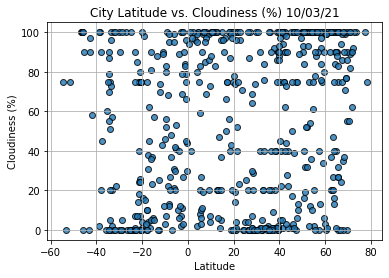

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

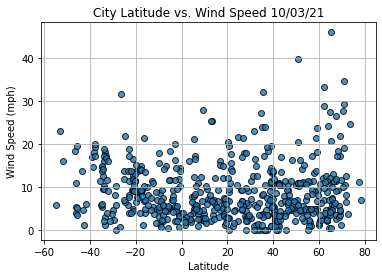

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [14]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")

    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

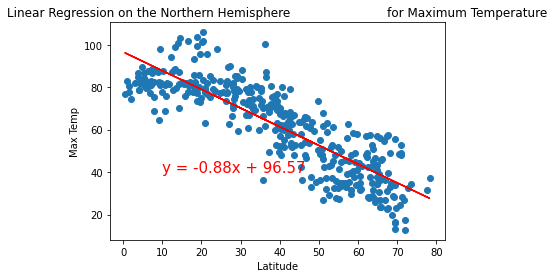

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

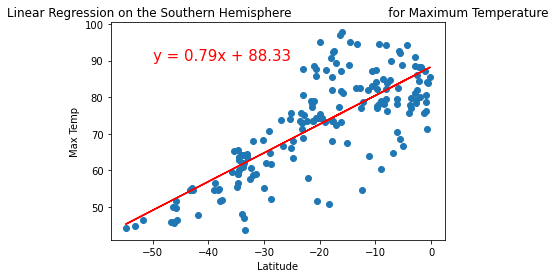

In [17]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

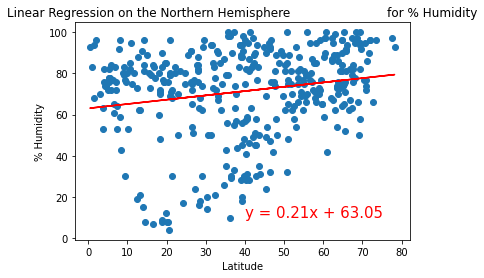

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

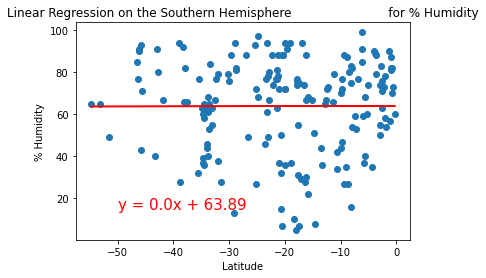

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

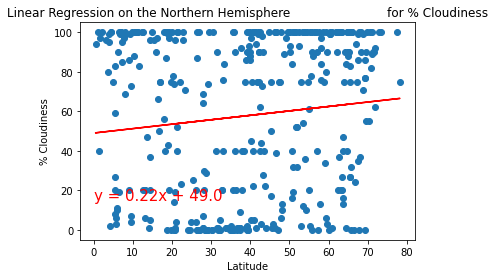

In [20]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,15))

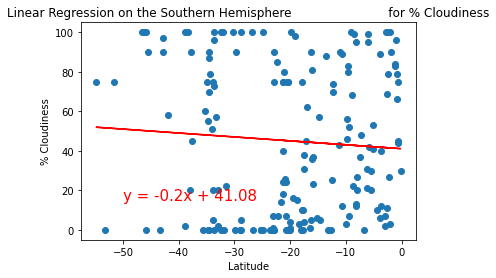

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

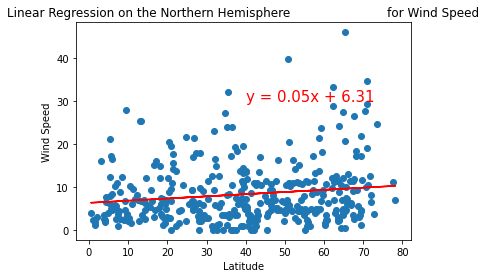

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

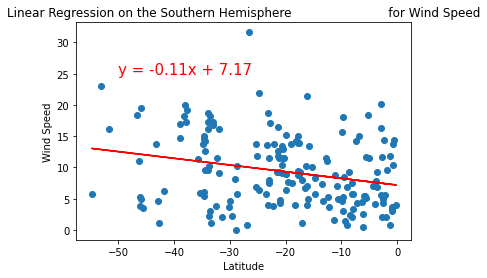

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [26]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)